Project: Advanced Machine Learning

Intsructor: Prof.Dr. Murali Shanker

Group 6 Students:
Javadbay Khalilzade,
Nandini Raveendran Nair Subhadra,
Nora Alsafiani, Delaney Curran, Srujana Kasturi

In [1]:
from google.colab import drive

drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
import pandas as pd

# The file path to Google Drive
file_path = '/content/drive/MyDrive/generated_traffic_data.csv'

# Read the CSV file
df = pd.read_csv(file_path)



df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    2016 non-null   object 
 1   TrafficFlow  2016 non-null   float64
 2   Weather      2016 non-null   object 
 3   Holiday      2016 non-null   float64
dtypes: float64(2), object(2)
memory usage: 63.1+ KB


In [5]:
import pandas as pd
df = pd.read_csv(file_path)
df.head()

,Timestamp,TrafficFlow,Weather,Holiday
0,2023-08-09 01:00:00,28.231815,Clear,0.0
1,2023-08-09 02:00:00,37.087004,Rainy,0.0
2,2023-08-09 03:00:00,31.637700,Clear,0.0
3,2023-08-09 04:00:00,23.526085,Rainy,0.0
4,2023-08-09 05:00:00,27.565911,Rainy,0.0


In [6]:
import os


fname = '/content/drive/MyDrive/generated_traffic_data.csv'

# read the file
with open(fname) as f:
    data = f.read()


lines = data.split("\n")
header = lines[0].split(",")
lines = lines[1:]


print(header)
print(len(lines))



['Timestamp', 'TrafficFlow', 'Weather', 'Holiday']
2017


In [7]:
import numpy as np

temperature = np.zeros((len(lines),))
raw_data = np.zeros((len(lines), len(header) - 1))

for i, line in enumerate(lines):
    values = line.split(",")[1:]
    if len(values) >= 2 and all(x.replace('.', '', 1).isdigit() for x in values):
        values = [float(x) for x in values]
        temperature[i] = values[1]
        raw_data[i, :] = values[:]
    else:
        print(f"Skipping non-numeric or incomplete data in line {i+1}: {line}")



Skipping non-numeric or incomplete data in line 1: 2023-08-09 01:00:00,28.231815022262495,Clear,0.0
Skipping non-numeric or incomplete data in line 2: 2023-08-09 02:00:00,37.08700429868829,Rainy,0.0
Skipping non-numeric or incomplete data in line 3: 2023-08-09 03:00:00,31.637700293684816,Clear,0.0
Skipping non-numeric or incomplete data in line 4: 2023-08-09 04:00:00,23.526084949743456,Rainy,0.0
Skipping non-numeric or incomplete data in line 5: 2023-08-09 05:00:00,27.565911235255314,Rainy,0.0
Skipping non-numeric or incomplete data in line 6: 2023-08-09 06:00:00,-1.8560252570025306,Rainy,0.0
Skipping non-numeric or incomplete data in line 7: 2023-08-09 07:00:00,6.704137224545459,Snowy,0.0
Skipping non-numeric or incomplete data in line 8: 2023-08-09 08:00:00,48.06910965388347,Clear,0.0
Skipping non-numeric or incomplete data in line 9: 2023-08-09 09:00:00,67.71125256568688,Clear,0.0
Skipping non-numeric or incomplete data in line 10: 2023-08-09 10:00:00,15.483319839323036,Rainy,0.0
Sk

In [8]:
print(df.columns)

Index(['Timestamp', 'TrafficFlow', 'Weather', 'Holiday'], dtype='object')


In [9]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('/content/drive/MyDrive/generated_traffic_data.csv')

data['Timestamp'] = pd.to_datetime(data['Timestamp'])


data['Hour'] = data['Timestamp'].dt.hour
data['DayOfWeek'] = data['Timestamp'].dt.dayofweek



data.drop('Timestamp', axis=1, inplace=True)


scaler = MinMaxScaler()
data[['TrafficFlow']] = scaler.fit_transform(data[['TrafficFlow']])

In [10]:
# One-hot encode categorical columns
data = pd.get_dummies(data, columns=['Weather', 'Holiday'])
print(data.columns)

Index(['TrafficFlow', 'Hour', 'DayOfWeek', 'Weather_Clear', 'Weather_Rainy',
       'Weather_Snowy', 'Holiday_0.0', 'Holiday_1.0'],
      dtype='object')


In [11]:

features = ['Hour', 'DayOfWeek', 'Weather_Clear', 'Weather_Rainy', 'Weather_Snowy', 'Holiday_0.0', 'Holiday_1.0']

target = 'TrafficFlow'


X = data[features]
y = data[target]


In [12]:
from sklearn.model_selection import train_test_split

# Split the data into training and temp data, 80% train, 20% temp.
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the temp data into training and validation sets, 60% train, 20% validation.
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=42)


del X_train_temp, y_train_temp


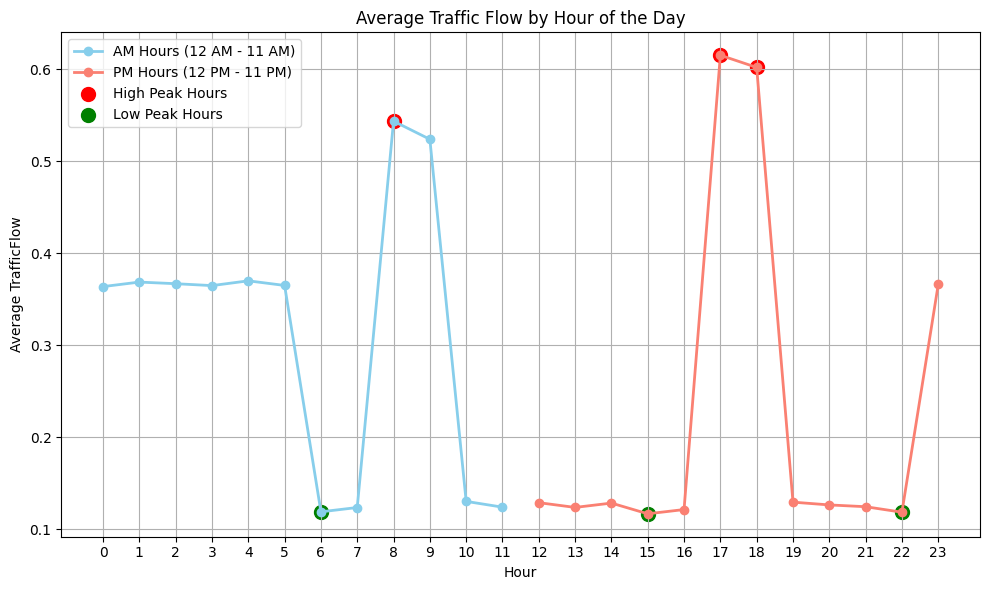

In [13]:
import matplotlib.pyplot as plt


hourly_traffic = data.groupby('Hour')['TrafficFlow'].mean()

plt.figure(figsize=(10, 6))


plt.plot(hourly_traffic[:12].index, hourly_traffic[:12].values, marker='o', linestyle='-', color='skyblue', linewidth=2, label='AM Hours (12 AM - 11 AM)')


plt.plot(hourly_traffic[12:].index, hourly_traffic[12:].values, marker='o', linestyle='-', color='salmon', linewidth=2, label='PM Hours (12 PM - 11 PM)')


high_peak_hours = hourly_traffic.nlargest(3)
plt.scatter(high_peak_hours.index, high_peak_hours.values, color='red', s=100, label='High Peak Hours')


low_peak_hours = hourly_traffic.nsmallest(3)
plt.scatter(low_peak_hours.index, low_peak_hours.values, color='green', s=100, label='Low Peak Hours')


plt.title('Average Traffic Flow by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Average TrafficFlow')
plt.grid(True)
plt.xticks(range(24))
plt.legend()
plt.tight_layout()
plt.show()



In [14]:
import numpy as np


def create_sequences(X, y, time_steps=10):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps):
        X_seq.append(X.iloc[i:(i + time_steps)].values)
        y_seq.append(y.iloc[i + time_steps])
    return np.array(X_seq), np.array(y_seq)

time_steps = 10
X_train_seq, y_train_seq = create_sequences(X_train, y_train, time_steps)
X_val_seq, y_val_seq = create_sequences(X_val, y_val, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, time_steps)



In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense


rnn_model = Sequential()


rnn_model.add(SimpleRNN(units=64, activation='relu', input_shape=(time_steps, X_train_seq.shape[2])))


rnn_model.add(Dense(units=5))


rnn_model.compile(optimizer='adam', loss='mean_squared_error')


rnn_model.fit(X_train_seq, y_train_seq, epochs=10, batch_size=32, validation_data=(X_val_seq, y_val_seq))




Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 5.8140 - val_loss: 0.8020
Epoch 2/10
38/38 [==============================] - 0s 6ms/step - loss: 0.4556 - val_loss: 0.2519
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 0.2054 - val_loss: 0.1660
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 0.1422 - val_loss: 0.1268
Epoch 5/10
38/38 [==============================] - 0s 6ms/step - loss: 0.1120 - val_loss: 0.1046
Epoch 6/10
38/38 [==============================] - 0s 5ms/step - loss: 0.0939 - val_loss: 0.0935
Epoch 7/10
38/38 [==============================] - 0s 7ms/step - loss: 0.0808 - val_loss: 0.0836
Epoch 8/10
38/38 [==============================] - 0s 7ms/step - loss: 0.0747 - val_loss: 0.0773
Epoch 9/10
38/38 [==============================] - 0s 7ms/step - loss: 0.0672 - val_loss: 0.0723
Epoch 10/10
38/38 [==============================] - 0s 7ms/step - loss: 0.0618 - val_loss: 0.0681


Epoch 1/10
38/38 [==============================] - 1s 23ms/step - loss: 0.0583 - val_loss: 0.0681
Epoch 2/10
38/38 [==============================] - 1s 18ms/step - loss: 0.0552 - val_loss: 0.0635
Epoch 3/10
38/38 [==============================] - 1s 17ms/step - loss: 0.0523 - val_loss: 0.0592
Epoch 4/10
38/38 [==============================] - 1s 22ms/step - loss: 0.0510 - val_loss: 0.0577
Epoch 5/10
38/38 [==============================] - 1s 26ms/step - loss: 0.0489 - val_loss: 0.0553
Epoch 6/10
38/38 [==============================] - 1s 24ms/step - loss: 0.0475 - val_loss: 0.0573
Epoch 7/10
38/38 [==============================] - 1s 38ms/step - loss: 0.0461 - val_loss: 0.0531
Epoch 8/10
38/38 [==============================] - 1s 21ms/step - loss: 0.0446 - val_loss: 0.0539
Epoch 9/10
38/38 [==============================] - 0s 10ms/step - loss: 0.0443 - val_loss: 0.0515
Epoch 10/10
38/38 [==============================] - 0s 12ms/step - loss: 0.0429 - val_loss: 0.0517


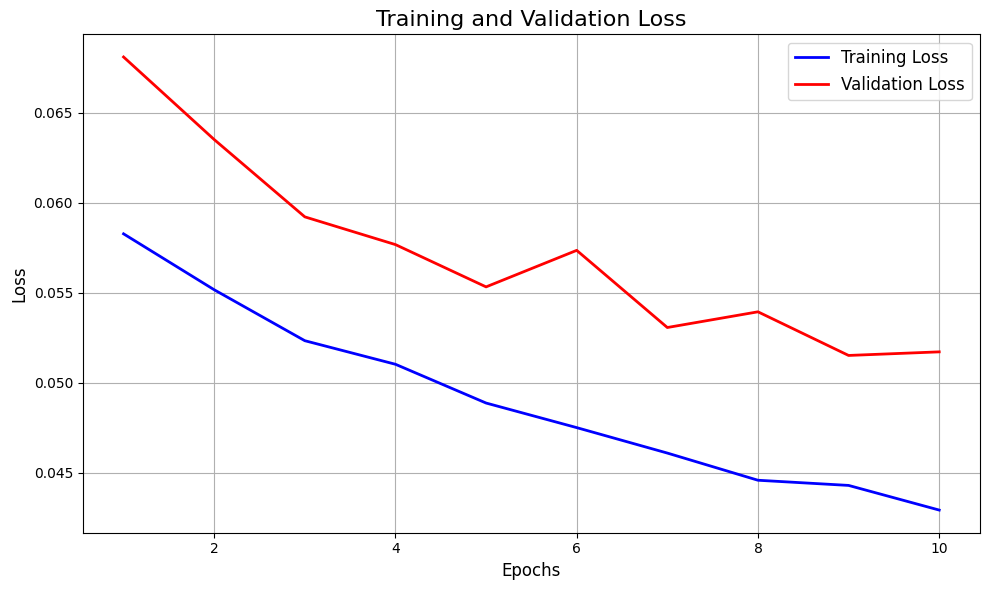

Epoch 1: Training Loss = 0.0583, Validation Loss = 0.0681
Epoch 2: Training Loss = 0.0552, Validation Loss = 0.0635
Epoch 3: Training Loss = 0.0523, Validation Loss = 0.0592
Epoch 4: Training Loss = 0.0510, Validation Loss = 0.0577
Epoch 5: Training Loss = 0.0489, Validation Loss = 0.0553
Epoch 6: Training Loss = 0.0475, Validation Loss = 0.0573
Epoch 7: Training Loss = 0.0461, Validation Loss = 0.0531
Epoch 8: Training Loss = 0.0446, Validation Loss = 0.0539
Epoch 9: Training Loss = 0.0443, Validation Loss = 0.0515
Epoch 10: Training Loss = 0.0429, Validation Loss = 0.0517


In [16]:
import matplotlib.pyplot as plt


history = rnn_model.fit(X_train_seq, y_train_seq, epochs=10, batch_size=32, validation_data=(X_val_seq, y_val_seq))


train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)


plt.figure(figsize=(10, 6))

plt.plot(epochs, train_loss, 'b', label='Training Loss', linewidth=2)
plt.plot(epochs, val_loss, 'r', label='Validation Loss', linewidth=2)

plt.title('Training and Validation Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()

plt.show()


for epoch, train_loss_value, val_loss_value in zip(epochs, train_loss, val_loss):
    print(f"Epoch {epoch}: Training Loss = {train_loss_value:.4f}, Validation Loss = {val_loss_value:.4f}")


Epoch 1/10
38/38 [==============================] - 2s 13ms/step - loss: 2.1847 - val_loss: 0.3643
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 0.2711 - val_loss: 0.1897
Epoch 3/10
38/38 [==============================] - 0s 6ms/step - loss: 0.1640 - val_loss: 0.1398
Epoch 4/10
38/38 [==============================] - 0s 6ms/step - loss: 0.1196 - val_loss: 0.1089
Epoch 5/10
38/38 [==============================] - 0s 7ms/step - loss: 0.0939 - val_loss: 0.0910
Epoch 6/10
38/38 [==============================] - 0s 6ms/step - loss: 0.0782 - val_loss: 0.0773
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.0686 - val_loss: 0.0693
Epoch 8/10
38/38 [==============================] - 0s 10ms/step - loss: 0.0621 - val_loss: 0.0653
Epoch 9/10
38/38 [==============================] - 0s 10ms/step - loss: 0.0584 - val_loss: 0.0599
Epoch 10/10
38/38 [==============================] - 0s 11ms/step - loss: 0.0543 - val_loss: 0.0542
Epoch 1/10
19/1

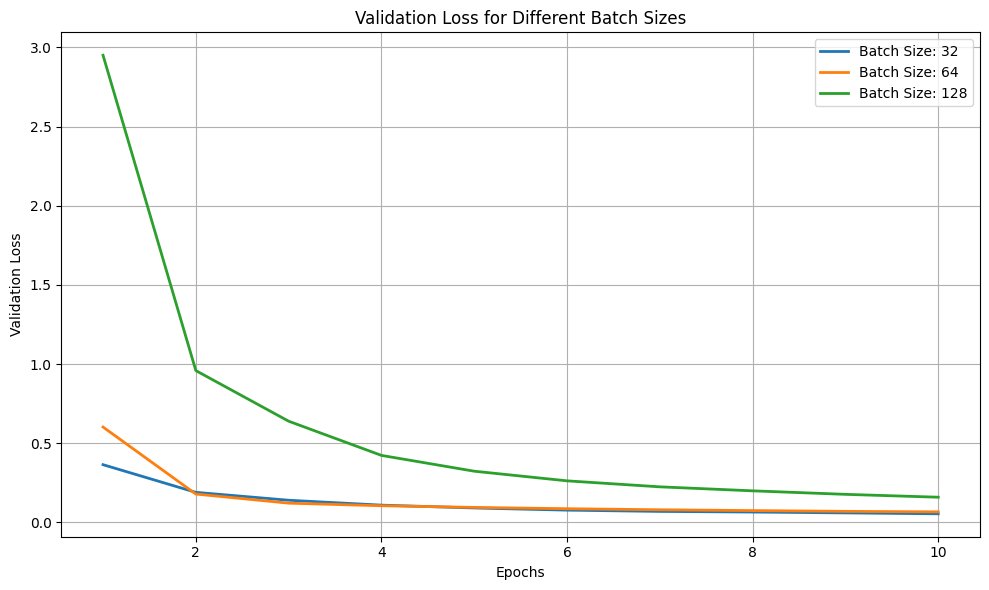

In [59]:
import matplotlib.pyplot as plt

batch_sizes = [32, 64, 128]
histories = []

for batch_size in batch_sizes:

    rnn_model = Sequential()


    rnn_model.add(SimpleRNN(units=64, activation='relu', input_shape=(time_steps, X_train_seq.shape[2])))


    rnn_model.add(Dense(units=5))


    rnn_model.compile(optimizer='adam', loss='mean_squared_error')


    history = rnn_model.fit(X_train_seq, y_train_seq, epochs=10, batch_size=batch_size, validation_data=(X_val_seq, y_val_seq))
    histories.append(history)


plt.figure(figsize=(10, 6))

for i, history in enumerate(histories):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(train_loss) + 1)

    plt.plot(epochs, val_loss, label=f'Batch Size: {batch_sizes[i]}', linewidth=2)

plt.title('Validation Loss for Different Batch Sizes')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()




Epoch 1/10
38/38 [==============================] - 5s 22ms/step - loss: 1.5981 - val_loss: 0.2380
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 0.1731 - val_loss: 0.1418
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 0.1149 - val_loss: 0.1085
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 0.0919 - val_loss: 0.0871
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 0.0762 - val_loss: 0.0751
Epoch 6/10
38/38 [==============================] - 0s 7ms/step - loss: 0.0658 - val_loss: 0.0664
Epoch 7/10
38/38 [==============================] - 0s 6ms/step - loss: 0.0579 - val_loss: 0.0604
Epoch 8/10
38/38 [==============================] - 0s 8ms/step - loss: 0.0531 - val_loss: 0.0564
Epoch 9/10
38/38 [==============================] - 0s 8ms/step - loss: 0.0511 - val_loss: 0.0540
Epoch 10/10
38/38 [==============================] - 0s 7ms/step - loss: 0.0470 - val_loss: 0.0552
Epoch 1/10
19/19 [

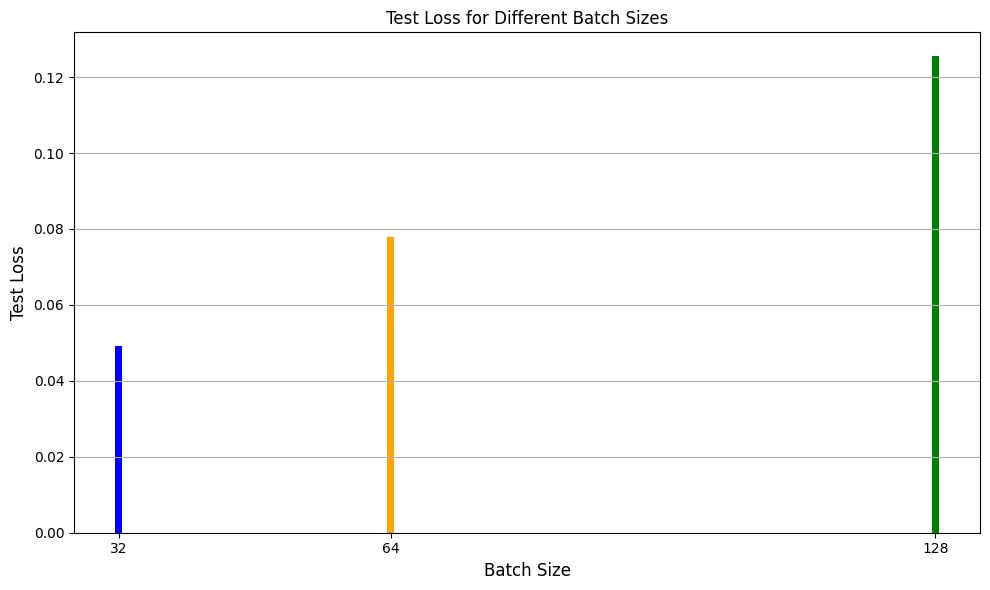

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

rnn_models = []


for batch_size in batch_sizes:

    rnn_model = Sequential()


    rnn_model.add(SimpleRNN(units=64, activation='relu', input_shape=(time_steps, X_train_seq.shape[2])))


    rnn_model.add(Dense(units=5))


    rnn_model.compile(optimizer='adam', loss='mean_squared_error')


    rnn_model.fit(X_train_seq, y_train_seq, epochs=10, batch_size=batch_size, validation_data=(X_val_seq, y_val_seq))


    rnn_models.append(rnn_model)


test_results = []

for i, batch_size in enumerate(batch_sizes):

    test_result = rnn_models[i].evaluate(X_test_seq, y_test_seq)


    print(f"Model with Batch Size {batch_size}: Test Loss: {test_result}")


    test_results.append(test_result)


plt.figure(figsize=(10, 6))


plt.bar(batch_sizes, test_results, color=['blue', 'orange', 'green'])
plt.title('Test Loss for Different Batch Sizes', fontsize=12)
plt.xlabel('Batch Size', fontsize=12)
plt.ylabel('Test Loss', fontsize=12)
plt.xticks(batch_sizes)
plt.grid(axis='y')
plt.tight_layout()

plt.show()


Build and Train LSTM Model:


In [22]:
from tensorflow.keras.layers import LSTM


lstm_model = Sequential()


lstm_model.add(LSTM(units=64, activation='relu', input_shape=(time_steps, X_train_seq.shape[2])))


lstm_model.add(Dense(units=5))


lstm_model.compile(optimizer='adam', loss='mean_squared_error')


lstm_model.fit(X_train_seq, y_train_seq, epochs=10, batch_size=32, validation_data=(X_val_seq, y_val_seq))


Epoch 1/10
38/38 [==============================] - 2s 18ms/step - loss: 0.1697 - val_loss: 0.0622
Epoch 2/10
38/38 [==============================] - 0s 11ms/step - loss: 0.0444 - val_loss: 0.0497
Epoch 3/10
38/38 [==============================] - 0s 11ms/step - loss: 0.0392 - val_loss: 0.0454
Epoch 4/10
38/38 [==============================] - 0s 10ms/step - loss: 0.0372 - val_loss: 0.0428
Epoch 5/10
38/38 [==============================] - 0s 12ms/step - loss: 0.0357 - val_loss: 0.0418
Epoch 6/10
38/38 [==============================] - 0s 11ms/step - loss: 0.0355 - val_loss: 0.0404
Epoch 7/10
38/38 [==============================] - 0s 11ms/step - loss: 0.0347 - val_loss: 0.0394
Epoch 8/10
38/38 [==============================] - 0s 11ms/step - loss: 0.0342 - val_loss: 0.0396
Epoch 9/10
38/38 [==============================] - 0s 10ms/step - loss: 0.0349 - val_loss: 0.0409
Epoch 10/10
38/38 [==============================] - 0s 11ms/step - loss: 0.0336 - val_loss: 0.0386


Epoch 1/10
38/38 [==============================] - 1s 14ms/step - loss: 0.0334 - val_loss: 0.0385
Epoch 2/10
38/38 [==============================] - 1s 16ms/step - loss: 0.0329 - val_loss: 0.0388
Epoch 3/10
38/38 [==============================] - 1s 15ms/step - loss: 0.0334 - val_loss: 0.0382
Epoch 4/10
38/38 [==============================] - 1s 15ms/step - loss: 0.0324 - val_loss: 0.0381
Epoch 5/10
38/38 [==============================] - 1s 14ms/step - loss: 0.0320 - val_loss: 0.0405
Epoch 6/10
38/38 [==============================] - 1s 14ms/step - loss: 0.0326 - val_loss: 0.0383
Epoch 7/10
38/38 [==============================] - 1s 17ms/step - loss: 0.0319 - val_loss: 0.0384
Epoch 8/10
38/38 [==============================] - 1s 15ms/step - loss: 0.0332 - val_loss: 0.0406
Epoch 9/10
38/38 [==============================] - 1s 14ms/step - loss: 0.0321 - val_loss: 0.0390
Epoch 10/10
38/38 [==============================] - 1s 16ms/step - loss: 0.0313 - val_loss: 0.0404


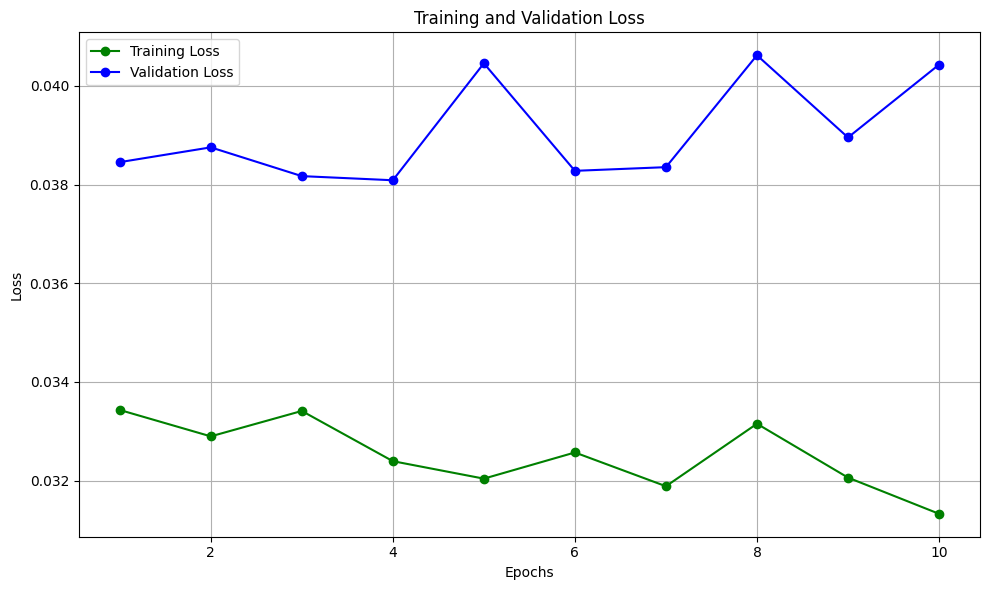

Epoch 1: Training Loss = 0.0334, Validation Loss = 0.0385
Epoch 2: Training Loss = 0.0329, Validation Loss = 0.0388
Epoch 3: Training Loss = 0.0334, Validation Loss = 0.0382
Epoch 4: Training Loss = 0.0324, Validation Loss = 0.0381
Epoch 5: Training Loss = 0.0320, Validation Loss = 0.0405
Epoch 6: Training Loss = 0.0326, Validation Loss = 0.0383
Epoch 7: Training Loss = 0.0319, Validation Loss = 0.0384
Epoch 8: Training Loss = 0.0332, Validation Loss = 0.0406
Epoch 9: Training Loss = 0.0321, Validation Loss = 0.0390
Epoch 10: Training Loss = 0.0313, Validation Loss = 0.0404


In [23]:
import matplotlib.pyplot as plt


history_lstm = lstm_model.fit(X_train_seq, y_train_seq, epochs=10, batch_size=32, validation_data=(X_val_seq, y_val_seq))



train_loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']
epochs = range(1, len(train_loss) + 1)


plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'g', label='Training Loss', marker='o')
plt.plot(epochs, val_loss, 'b', label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


for epoch, train_loss_value, val_loss_value in zip(epochs, train_loss, val_loss):
    print(f"Epoch {epoch}: Training Loss = {train_loss_value:.4f}, Validation Loss = {val_loss_value:.4f}")



Epoch 1/10
38/38 [==============================] - 3s 18ms/step - loss: 0.0746 - val_loss: 0.0462
Epoch 2/10
38/38 [==============================] - 0s 11ms/step - loss: 0.0381 - val_loss: 0.0396
Epoch 3/10
38/38 [==============================] - 0s 11ms/step - loss: 0.0353 - val_loss: 0.0383
Epoch 4/10
38/38 [==============================] - 0s 11ms/step - loss: 0.0343 - val_loss: 0.0393
Epoch 5/10
38/38 [==============================] - 0s 12ms/step - loss: 0.0345 - val_loss: 0.0375
Epoch 6/10
38/38 [==============================] - 0s 10ms/step - loss: 0.0339 - val_loss: 0.0374
Epoch 7/10
38/38 [==============================] - 0s 10ms/step - loss: 0.0335 - val_loss: 0.0374
Epoch 8/10
38/38 [==============================] - 0s 10ms/step - loss: 0.0330 - val_loss: 0.0377
Epoch 9/10
38/38 [==============================] - 0s 10ms/step - loss: 0.0331 - val_loss: 0.0369
Epoch 10/10
38/38 [==============================] - 0s 10ms/step - loss: 0.0325 - val_loss: 0.0367
Epoch 1/1

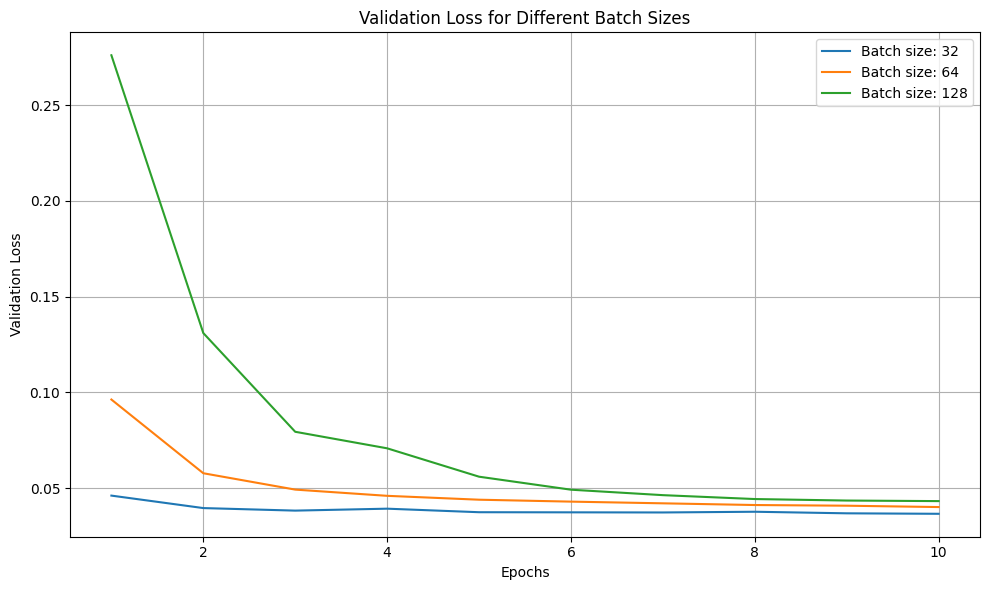

In [25]:
batch_sizes = [32, 64, 128]
histories = []

for batch_size in batch_sizes:

    lstm_model = Sequential()
    lstm_model.add(LSTM(units=64, activation='relu', input_shape=(time_steps, X_train_seq.shape[2])))
    lstm_model.add(Dense(units=5))
    lstm_model.compile(optimizer='adam', loss='mean_squared_error')


    history = lstm_model.fit(X_train_seq, y_train_seq, epochs=10, batch_size=batch_size, validation_data=(X_val_seq, y_val_seq))
    histories.append(history)


plt.figure(figsize=(10, 6))

for i, history in enumerate(histories):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(train_loss) + 1)
    plt.plot(epochs, val_loss, label=f'Batch size: {batch_sizes[i]}')

plt.title('Validation Loss for Different Batch Sizes')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

lstm_histories = []
test_results_lstm = []

batch_sizes = [32, 64, 128]

for batch_size in batch_sizes:
    lstm_model = Sequential()
    lstm_model.add(LSTM(units=64, activation='relu', input_shape=(time_steps, X_train_seq.shape[2])))
    lstm_model.add(Dense(units=5))
    lstm_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

    history_lstm = lstm_model.fit(X_train_seq, y_train_seq, epochs=10, batch_size=batch_size, validation_data=(X_val_seq, y_val_seq))
    lstm_histories.append((batch_size, history_lstm))

    test_result_lstm = lstm_model.evaluate(X_test_seq, y_test_seq)
    test_results_lstm.append((batch_size, test_result_lstm))

for batch_size, test_result_lstm in test_results_lstm:
    print(f"Test Results for LSTM Model with Batch Size {batch_size}:")
    print(f"Test Loss: {test_result_lstm[0]}")
    print("\n")


Epoch 1/10
38/38 [==============================] - 7s 40ms/step - loss: 0.2369 - mean_squared_error: 0.2369 - val_loss: 0.0722 - val_mean_squared_error: 0.0722
Epoch 2/10
38/38 [==============================] - 0s 10ms/step - loss: 0.0518 - mean_squared_error: 0.0518 - val_loss: 0.0491 - val_mean_squared_error: 0.0491
Epoch 3/10
38/38 [==============================] - 0s 12ms/step - loss: 0.0401 - mean_squared_error: 0.0401 - val_loss: 0.0420 - val_mean_squared_error: 0.0420
Epoch 4/10
38/38 [==============================] - 0s 11ms/step - loss: 0.0368 - mean_squared_error: 0.0368 - val_loss: 0.0391 - val_mean_squared_error: 0.0391
Epoch 5/10
38/38 [==============================] - 0s 10ms/step - loss: 0.0354 - mean_squared_error: 0.0354 - val_loss: 0.0390 - val_mean_squared_error: 0.0390
Epoch 6/10
38/38 [==============================] - 0s 10ms/step - loss: 0.0351 - mean_squared_error: 0.0351 - val_loss: 0.0378 - val_mean_squared_error: 0.0378
Epoch 7/10
38/38 [================

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam



def create_rnn_model(units=64, learning_rate=0.001):
    rnn_model = Sequential()
    rnn_model.add(SimpleRNN(units=units, activation='relu', input_shape=(time_steps, X_train_seq.shape[2])))
    rnn_model.add(Dense(units=1))

    optimizer = Adam(learning_rate=learning_rate)
    rnn_model.compile(optimizer=optimizer, loss='mean_squared_error')

    return rnn_model


learning_rates = [0.001, 0.01, 0.1]
units_list = [32, 64, 128]

histories = []

for lr in learning_rates:
    for units in units_list:
        model = create_rnn_model(units=units, learning_rate=lr)
        history = model.fit(X_train_seq, y_train_seq, epochs=10, batch_size=32, validation_data=(X_val_seq, y_val_seq))
        histories.append((lr, units, history))




Epoch 1/10
38/38 [==============================] - 2s 17ms/step - loss: 4.5220 - val_loss: 0.4998
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 0.4170 - val_loss: 0.3572
Epoch 3/10
38/38 [==============================] - 0s 9ms/step - loss: 0.3032 - val_loss: 0.2711
Epoch 4/10
38/38 [==============================] - 0s 13ms/step - loss: 0.2354 - val_loss: 0.2167
Epoch 5/10
38/38 [==============================] - 0s 10ms/step - loss: 0.1914 - val_loss: 0.1760
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 0.1647 - val_loss: 0.1520
Epoch 7/10
38/38 [==============================] - 0s 10ms/step - loss: 0.1464 - val_loss: 0.1454
Epoch 8/10
38/38 [==============================] - 0s 9ms/step - loss: 0.1351 - val_loss: 0.1231
Epoch 9/10
38/38 [==============================] - 0s 11ms/step - loss: 0.1251 - val_loss: 0.1151
Epoch 10/10
38/38 [==============================] - 0s 12ms/step - loss: 0.1164 - val_loss: 0.1082
Epoch 1/10
38

In [31]:

validation_losses = []
for lr, units, history in histories:
    validation_loss = history.history['val_loss'][-1]
    validation_losses.append((lr, units, validation_loss))


best_model_lr, best_model_units, _ = min(validation_losses, key=lambda x: x[2])
print(f"Best Model - Learning Rate: {best_model_lr}, Units: {best_model_units}")


best_model = create_rnn_model(units=best_model_units, learning_rate=best_model_lr)
best_model.fit(X_train_seq, y_train_seq, epochs=10, batch_size=32, validation_data=(X_val_seq, y_val_seq))


test_loss = best_model.evaluate(X_test_seq, y_test_seq)
print(f"Test Loss: {test_loss}")




Best Model - Learning Rate: 0.1, Units: 32
Epoch 1/10
38/38 [==============================] - 3s 13ms/step - loss: 182.9313 - val_loss: 0.1266
Epoch 2/10
38/38 [==============================] - 0s 6ms/step - loss: 0.0896 - val_loss: 0.0592
Epoch 3/10
38/38 [==============================] - 0s 5ms/step - loss: 0.0729 - val_loss: 0.0506
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 0.0527 - val_loss: 0.1010
Epoch 5/10
38/38 [==============================] - 0s 7ms/step - loss: 0.0623 - val_loss: 0.0620
Epoch 6/10
38/38 [==============================] - 0s 6ms/step - loss: 0.0494 - val_loss: 0.0968
Epoch 7/10
38/38 [==============================] - 0s 6ms/step - loss: 0.0681 - val_loss: 0.0423
Epoch 8/10
38/38 [==============================] - 0s 6ms/step - loss: 0.0462 - val_loss: 0.1268
Epoch 9/10
38/38 [==============================] - 0s 6ms/step - loss: 0.0584 - val_loss: 0.0496
Epoch 10/10
13/13 [==============================] - 0s 2ms/step - loss:

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam


def create_rnn_model(units=64, learning_rate=0.01):
    rnn_model = Sequential()
    rnn_model.add(SimpleRNN(units=units, activation='relu', input_shape=(time_steps, X_train_seq.shape[2])))
    rnn_model.add(Dense(units=5))

    optimizer = Adam(learning_rate=learning_rate)
    rnn_model.compile(optimizer=optimizer, loss='mean_squared_error')

    return rnn_model


learning_rates = [0.001, 0.01, 0.1]
units_list = [32, 64, 128]

histories = []

for lr in learning_rates:
    for units in units_list:
        model = create_rnn_model(units=units, learning_rate=lr)
        history = model.fit(X_train_seq, y_train_seq, epochs=10, batch_size=32, validation_data=(X_val_seq, y_val_seq))
        histories.append((lr, units, history))




Epoch 1/10
38/38 [==============================] - 2s 14ms/step - loss: 7.1265 - val_loss: 1.8237
Epoch 2/10
38/38 [==============================] - 0s 6ms/step - loss: 0.9119 - val_loss: 0.5299
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 0.3926 - val_loss: 0.3299
Epoch 4/10
38/38 [==============================] - 0s 6ms/step - loss: 0.2748 - val_loss: 0.2557
Epoch 5/10
38/38 [==============================] - 0s 6ms/step - loss: 0.2169 - val_loss: 0.2089
Epoch 6/10
38/38 [==============================] - 0s 6ms/step - loss: 0.1773 - val_loss: 0.1708
Epoch 7/10
38/38 [==============================] - 0s 6ms/step - loss: 0.1501 - val_loss: 0.1485
Epoch 8/10
38/38 [==============================] - 0s 6ms/step - loss: 0.1295 - val_loss: 0.1305
Epoch 9/10
38/38 [==============================] - 0s 6ms/step - loss: 0.1148 - val_loss: 0.1158
Epoch 10/10
38/38 [==============================] - 0s 6ms/step - loss: 0.1034 - val_loss: 0.1065
Epoch 1/10
38/38 [

In [36]:


best_model = None
best_val_loss = float('inf')

for lr, units, history in histories:
    val_loss = history.history['val_loss'][-1]
    print(f"Model with LR={lr}, Units={units}: Validation Loss = {val_loss:.4f}")


    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model = (lr, units)

print("\nBest Model:")
print(f"Learning Rate: {best_model[0]}, Units: {best_model[1]}, Validation Loss: {best_val_loss:.4f}")


best_model_lr, best_model_units = best_model
best_model_instance = create_rnn_model(units=best_model_units, learning_rate=best_model_lr)
best_model_instance.fit(X_train_seq, y_train_seq, epochs=10, batch_size=32, validation_data=(X_val_seq, y_val_seq))


from tensorflow.keras.models import save_model
save_model(best_model_instance, 'best_rnn_model.h5')


Model with LR=0.001, Units=32: Validation Loss = 0.1065
Model with LR=0.001, Units=64: Validation Loss = 0.0682
Model with LR=0.001, Units=128: Validation Loss = 0.0473
Model with LR=0.01, Units=32: Validation Loss = 0.0437
Model with LR=0.01, Units=64: Validation Loss = 0.0418
Model with LR=0.01, Units=128: Validation Loss = 0.0397
Model with LR=0.1, Units=32: Validation Loss = 0.0367
Model with LR=0.1, Units=64: Validation Loss = 0.0446
Model with LR=0.1, Units=128: Validation Loss = 0.5911

Best Model:
Learning Rate: 0.1, Units: 32, Validation Loss: 0.0367
Epoch 1/10
38/38 [==============================] - 2s 20ms/step - loss: 24.8524 - val_loss: 0.0945
Epoch 2/10
38/38 [==============================] - 0s 11ms/step - loss: 0.0527 - val_loss: 0.0400
Epoch 3/10
38/38 [==============================] - 0s 10ms/step - loss: 0.0343 - val_loss: 0.0370
Epoch 4/10
38/38 [==============================] - 0s 10ms/step - loss: 0.0330 - val_loss: 0.0372
Epoch 5/10
38/38 [===================

<ipython-input-36-84e88bd27612>:23: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(best_model_instance, 'best_rnn_model.h5')


Hyper parameter tuning LSTM Model"

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam


def create_lstm_model(units=64, learning_rate=0.001):
    lstm_model = Sequential()
    lstm_model.add(LSTM(units=units, activation='relu', input_shape=(time_steps, X_train_seq.shape[2])))
    lstm_model.add(Dense(units=1))

    optimizer = Adam(learning_rate=learning_rate)
    lstm_model.compile(optimizer=optimizer, loss='mean_squared_error')

    return lstm_model


learning_rates = [0.001, 0.01, 0.1]
units_list = [32, 64, 128]

histories = []


for lr in learning_rates:
    for units in units_list:
        model = create_lstm_model(units=units, learning_rate=lr)
        history = model.fit(X_train_seq, y_train_seq, epochs=10, batch_size=32, validation_data=(X_val_seq, y_val_seq))
        histories.append((lr, units, history))




Epoch 1/10
38/38 [==============================] - 3s 22ms/step - loss: 0.9736 - val_loss: 0.1508
Epoch 2/10
38/38 [==============================] - 0s 12ms/step - loss: 0.1020 - val_loss: 0.0936
Epoch 3/10
38/38 [==============================] - 0s 13ms/step - loss: 0.0644 - val_loss: 0.0540
Epoch 4/10
38/38 [==============================] - 1s 14ms/step - loss: 0.0496 - val_loss: 0.0481
Epoch 5/10
38/38 [==============================] - 1s 14ms/step - loss: 0.0447 - val_loss: 0.0450
Epoch 6/10
38/38 [==============================] - 1s 15ms/step - loss: 0.0421 - val_loss: 0.0424
Epoch 7/10
38/38 [==============================] - 1s 15ms/step - loss: 0.0400 - val_loss: 0.0416
Epoch 8/10
38/38 [==============================] - 1s 14ms/step - loss: 0.0386 - val_loss: 0.0399
Epoch 9/10
38/38 [==============================] - 1s 15ms/step - loss: 0.0380 - val_loss: 0.0395
Epoch 10/10
38/38 [==============================] - 1s 14ms/step - loss: 0.0370 - val_loss: 0.0385
Epoch 1/1

In [41]:

lstm_validation_losses = []
for lr, units, history in histories:
    validation_loss = history.history['val_loss'][-1]
    lstm_validation_losses.append((lr, units, validation_loss))


best_lstm_lr, best_lstm_units, _ = min(lstm_validation_losses, key=lambda x: x[2])
print(f"Best LSTM Model - Learning Rate: {best_lstm_lr}, Units: {best_lstm_units}")


best_lstm_model = create_lstm_model(units=best_lstm_units, learning_rate=best_lstm_lr)
best_lstm_model.fit(X_train_seq, y_train_seq, epochs=10, batch_size=32, validation_data=(X_val_seq, y_val_seq))


test_loss_lstm = best_lstm_model.evaluate(X_test_seq, y_test_seq)
print(f"Test Loss (LSTM): {test_loss_lstm}")




Best LSTM Model - Learning Rate: 0.01, Units: 32
Epoch 1/10
38/38 [==============================] - 3s 21ms/step - loss: 1.1863 - val_loss: 0.0534
Epoch 2/10
38/38 [==============================] - 0s 13ms/step - loss: 0.0424 - val_loss: 0.0467
Epoch 3/10
38/38 [==============================] - 0s 12ms/step - loss: 0.0390 - val_loss: 0.0448
Epoch 4/10
38/38 [==============================] - 0s 13ms/step - loss: 0.0374 - val_loss: 0.0430
Epoch 5/10
38/38 [==============================] - 1s 13ms/step - loss: 0.0366 - val_loss: 0.0412
Epoch 6/10
38/38 [==============================] - 1s 14ms/step - loss: 0.0362 - val_loss: 0.0408
Epoch 7/10
38/38 [==============================] - 1s 16ms/step - loss: 0.0357 - val_loss: 0.0408
Epoch 8/10
38/38 [==============================] - 1s 15ms/step - loss: 0.0347 - val_loss: 0.0400
Epoch 9/10
38/38 [==============================] - 0s 10ms/step - loss: 0.0345 - val_loss: 0.0388
Epoch 10/10
13/13 [==============================] - 0s 3ms/

**Fine** Tuning:

In [42]:
import numpy as np

X_train_array = X_train.to_numpy()
X_val_array = X_val.to_numpy()


X_train_reshaped = X_train_array.reshape(X_train_array.shape[0], X_train_array.shape[1], 1)
X_val_reshaped = X_val_array.reshape(X_val_array.shape[0], X_val_array.shape[1], 1)



In [43]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)


(1209, 7) (1209,)
(403, 7) (403,)


In [44]:
print(X_train.shape)
print(y_train.shape)


(1209, 7)
(1209,)


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import ParameterGrid


def create_lstm_model(units=64, learning_rate=0.001):
    model = Sequential()


    input_shape = (X_train.shape[1], 1)


    model.add(LSTM(units=units, activation='relu', input_shape=input_shape))
    model.add(Dense(units=1))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    return model


param_grid = {
    'units': [32, 64, 128],
    'learning_rate': [0.001, 0.01, 0.1]
}


param_combinations = list(ParameterGrid(param_grid))

best_model = None
best_loss = float('inf')


for params in param_combinations:
    model = create_lstm_model(**params)
    history = model.fit(X_train, y_train.values.reshape(-1, 1), epochs=10, batch_size=32, validation_data=(X_val, y_val.values.reshape(-1, 1)))


    val_loss = history.history['val_loss'][-1]
    if val_loss < best_loss:
        best_loss = val_loss
        best_model = model


test_loss = best_model.evaluate(X_test, y_test.values.reshape(-1, 1))
print(f"Test Loss (Best Model): {test_loss}")


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 0.0971 - val_loss: 0.0553
Epoch 2/10
38/38 [==============================] - 0s 9ms/step - loss: 0.0438 - val_loss: 0.0408
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 0.0345 - val_loss: 0.0364
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 0.0324 - val_loss: 0.0358
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 0.0316 - val_loss: 0.0356
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 0.0311 - val_loss: 0.0349
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.0310 - val_loss: 0.0356
Epoch 8/10
38/38 [==============================] - 0s 8ms/step - loss: 0.0307 - val_loss: 0.0354
Epoch 9/10
38/38 [==============================] - 0s 7ms/step - loss: 0.0311 - val_loss: 0.0351
Epoch 10/10
38/38 [==============================] - 0s 7ms/step - loss: 0.0310 - val_loss: 0.0356
Epoch 1/10
38/38 [

Model Architecure:

Stacked Layers:

Epoch 1/10
38/38 [==============================] - 4s 27ms/step - loss: 0.0668 - val_loss: 0.0392
Epoch 2/10
38/38 [==============================] - 1s 16ms/step - loss: 0.0346 - val_loss: 0.0376
Epoch 3/10
38/38 [==============================] - 1s 18ms/step - loss: 0.0334 - val_loss: 0.0385
Epoch 4/10
38/38 [==============================] - 1s 20ms/step - loss: 0.0332 - val_loss: 0.0402
Epoch 5/10
38/38 [==============================] - 1s 19ms/step - loss: 0.0336 - val_loss: 0.0367
Epoch 6/10
38/38 [==============================] - 1s 24ms/step - loss: 0.0332 - val_loss: 0.0380
Epoch 7/10
38/38 [==============================] - 1s 31ms/step - loss: 0.0334 - val_loss: 0.0368
Epoch 8/10
38/38 [==============================] - 1s 30ms/step - loss: 0.0326 - val_loss: 0.0368
Epoch 9/10
38/38 [==============================] - 1s 29ms/step - loss: 0.0324 - val_loss: 0.0368
Epoch 10/10
38/38 [==============================] - 1s 29ms/step - loss: 0.0325 - val_loss: 0.0378


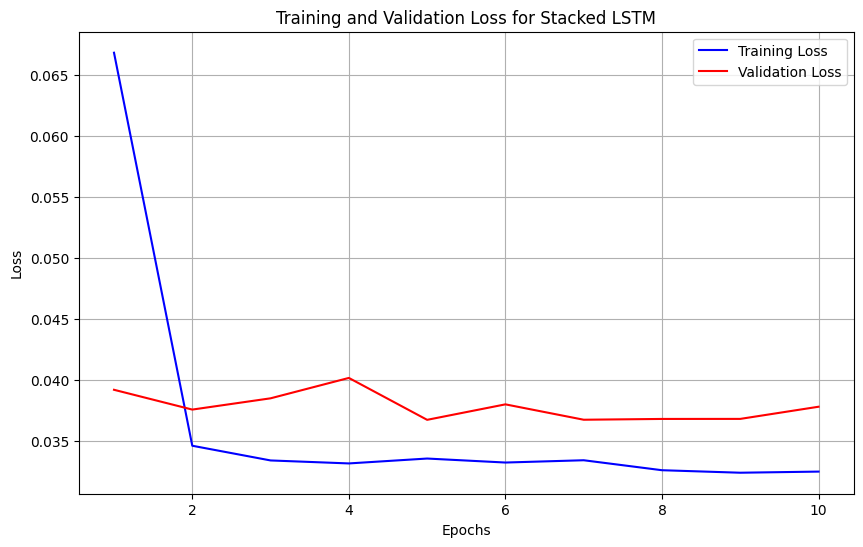

In [48]:
import matplotlib.pyplot as plt


stacked_lstm_model = Sequential()
stacked_lstm_model.add(LSTM(units=64, activation='relu', return_sequences=True, input_shape=(time_steps, X_train_seq.shape[2])))
stacked_lstm_model.add(LSTM(units=64, activation='relu'))  # Second LSTM layer
stacked_lstm_model.add(Dense(units=5))

stacked_lstm_model.compile(optimizer='adam', loss='mean_squared_error')
history_stacked = stacked_lstm_model.fit(X_train_seq, y_train_seq, epochs=10, batch_size=32, validation_data=(X_val_seq, y_val_seq))


train_loss_stacked = history_stacked.history['loss']
val_loss_stacked = history_stacked.history['val_loss']
epochs_stacked = range(1, len(train_loss_stacked) + 1)


plt.figure(figsize=(10, 6))
plt.plot(epochs_stacked, train_loss_stacked, 'b', label='Training Loss')
plt.plot(epochs_stacked, val_loss_stacked, 'r', label='Validation Loss')
plt.title('Training and Validation Loss for Stacked LSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [49]:
from tensorflow.keras.models import load_model


loaded_best_rnn_model = load_model('best_rnn_model.h5')


batch_size_rnn = loaded_best_rnn_model.layers[0].get_config()['batch_input_shape'][0]
units_rnn = loaded_best_rnn_model.layers[0].get_config()['units']
learning_rate_rnn = loaded_best_rnn_model.optimizer.lr.numpy()

print(f"Best RNN Model Details:")
print(f"Units: {units_rnn}, Learning Rate: {learning_rate_rnn}")


test_loss_rnn = loaded_best_rnn_model.evaluate(X_test_seq, y_test_seq)
print(f"Test Loss (Best RNN Model): {test_loss_rnn}")



Best RNN Model Details:
Units: 32, Learning Rate: 0.10000000149011612
13/13 [==============================] - 0s 3ms/step - loss: 0.0314
Test Loss (Best RNN Model): 0.03142755851149559


Epoch 1/10
38/38 [==============================] - 2s 13ms/step - loss: 0.8792 - val_loss: 0.0832
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 0.0569 - val_loss: 0.0536
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 0.0456 - val_loss: 0.0471
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 0.0415 - val_loss: 0.0467
Epoch 5/10
38/38 [==============================] - 0s 7ms/step - loss: 0.0396 - val_loss: 0.0445
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 0.0390 - val_loss: 0.0516
Epoch 7/10
38/38 [==============================] - 0s 7ms/step - loss: 0.0379 - val_loss: 0.0430
Epoch 8/10
38/38 [==============================] - 0s 7ms/step - loss: 0.0351 - val_loss: 0.0455
Epoch 9/10
38/38 [==============================] - 0s 8ms/step - loss: 0.0357 - val_loss: 0.0440
Epoch 10/10
13/13 [==============================] - 0s 3ms/step - loss: 0.0355
Epoch 1/10
38/38 [===================

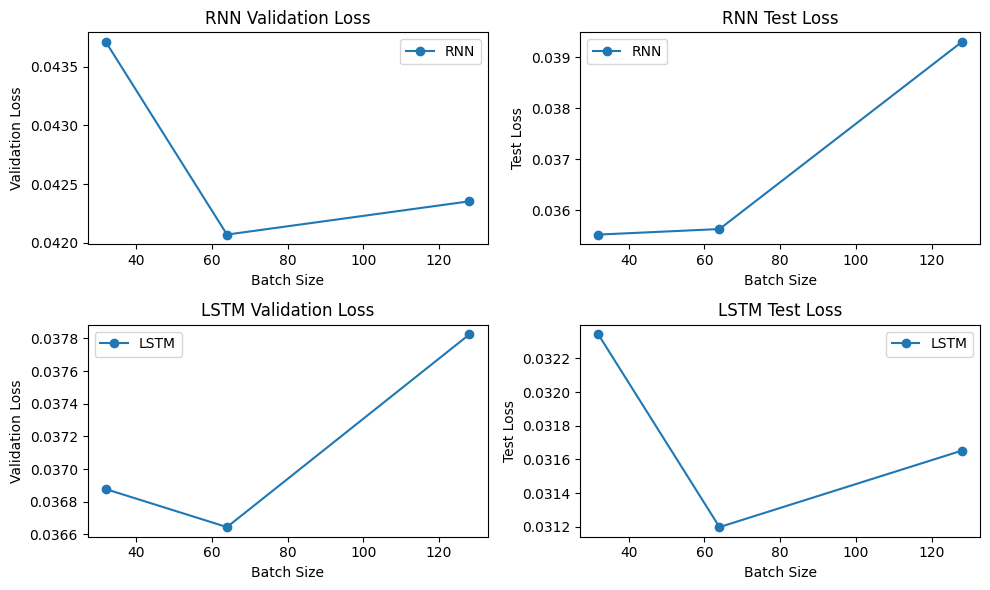

In [50]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LSTM, SimpleRNN, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import numpy as np



def create_rnn_model(units=64, learning_rate=0.01):
    rnn_model = Sequential()
    rnn_model.add(SimpleRNN(units=units, activation='relu', input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
    rnn_model.add(Dense(units=1))
    optimizer = Adam(learning_rate=learning_rate)
    rnn_model.compile(optimizer=optimizer, loss='mean_squared_error')
    return rnn_model


def create_lstm_model(units=64, learning_rate=0.01):
    lstm_model = Sequential()
    lstm_model.add(LSTM(units=units, activation='relu', input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
    lstm_model.add(Dense(units=5))
    optimizer = Adam(learning_rate=learning_rate)
    lstm_model.compile(optimizer=optimizer, loss='mean_squared_error')
    return lstm_model


batch_sizes = [32, 64, 128]


rnn_val_losses = []
rnn_test_losses = []
lstm_val_losses = []
lstm_test_losses = []


for batch_size in batch_sizes:

    rnn_model = create_rnn_model()
    rnn_model.fit(X_train_seq, y_train_seq, epochs=10, batch_size=batch_size, validation_data=(X_val_seq, y_val_seq))


    rnn_val_loss = rnn_model.evaluate(X_val_seq, y_val_seq)
    rnn_val_losses.append(rnn_val_loss)


    rnn_test_loss = rnn_model.evaluate(X_test_seq, y_test_seq)
    rnn_test_losses.append(rnn_test_loss)


    lstm_model = create_lstm_model()
    lstm_model.fit(X_train_seq, y_train_seq, epochs=10, batch_size=batch_size, validation_data=(X_val_seq, y_val_seq))


    lstm_val_loss = lstm_model.evaluate(X_val_seq, y_val_seq)
    lstm_val_losses.append(lstm_val_loss)


    lstm_test_loss = lstm_model.evaluate(X_test_seq, y_test_seq)
    lstm_test_losses.append(lstm_test_loss)


plt.figure(figsize=(10, 6))


plt.subplot(2, 2, 1)
plt.plot(batch_sizes, rnn_val_losses[:3], marker='o', label='RNN')
plt.title('RNN Validation Loss')
plt.xlabel('Batch Size')
plt.ylabel('Validation Loss')
plt.legend()


plt.subplot(2, 2, 2)
plt.plot(batch_sizes, rnn_test_losses[:3], marker='o', label='RNN')
plt.title('RNN Test Loss')
plt.xlabel('Batch Size')
plt.ylabel('Test Loss')
plt.legend()


plt.subplot(2, 2, 3)
plt.plot(batch_sizes, lstm_val_losses[:3], marker='o', label='LSTM')
plt.title('LSTM Validation Loss')
plt.xlabel('Batch Size')
plt.ylabel('Validation Loss')
plt.legend()


plt.subplot(2, 2, 4)
plt.plot(batch_sizes, lstm_test_losses[:3], marker='o', label='LSTM')
plt.title('LSTM Test Loss')
plt.xlabel('Batch Size')
plt.ylabel('Test Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [53]:

rnn_val_losses = []
rnn_test_losses = []
lstm_val_losses = []
lstm_test_losses = []


for batch_size in batch_sizes:

    rnn_model = create_rnn_model()
    rnn_model.fit(X_train_seq, y_train_seq, epochs=10, batch_size=batch_size, validation_data=(X_val_seq, y_val_seq))


    rnn_val_loss = rnn_model.evaluate(X_val_seq, y_val_seq)
    rnn_val_losses.append(rnn_val_loss)


    rnn_test_loss = rnn_model.evaluate(X_test_seq, y_test_seq)
    rnn_test_losses.append(rnn_test_loss)


    lstm_model = create_lstm_model()
    lstm_model.fit(X_train_seq, y_train_seq, epochs=10, batch_size=batch_size, validation_data=(X_val_seq, y_val_seq))


    lstm_val_loss = lstm_model.evaluate(X_val_seq, y_val_seq)
    lstm_val_losses.append(lstm_val_loss)


    lstm_test_loss = lstm_model.evaluate(X_test_seq, y_test_seq)
    lstm_test_losses.append(lstm_test_loss)


for i, batch_size in enumerate(batch_sizes):
    print(f"\nResults for Batch Size: {batch_size}")
    print(f"RNN Validation Loss: {rnn_val_losses[i]}")
    print(f"RNN Test Loss: {rnn_test_losses[i]}")
    print(f"LSTM Validation Loss: {lstm_val_losses[i]}")
    print(f"LSTM Test Loss: {lstm_test_losses[i]}")


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 1.7908 - val_loss: 0.0756
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 0.0596 - val_loss: 0.0545
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 0.0485 - val_loss: 0.0508
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 0.0438 - val_loss: 0.0502
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 0.0416 - val_loss: 0.0495
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 0.0392 - val_loss: 0.0487
Epoch 7/10
38/38 [==============================] - 0s 7ms/step - loss: 0.0383 - val_loss: 0.0475
Epoch 8/10
38/38 [==============================] - 0s 7ms/step - loss: 0.0375 - val_loss: 0.0453
Epoch 9/10
38/38 [==============================] - 0s 8ms/step - loss: 0.0362 - val_loss: 0.0442
Epoch 10/10
13/13 [==============================] - 0s 3ms/step - loss: 0.0361
Epoch 1/10
38/38 [===================